<a href="https://colab.research.google.com/github/Raries16/Practice/blob/main/hc_comp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/HC/dataset"

In [3]:
#changing the working directory
%cd /content/gdrive/My Drive/HC/dataset/

/content/gdrive/My Drive/HC/dataset


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import os

In [5]:
df = pd.read_csv('train.csv')

In [6]:
df.head()

,Image,Class
0,image3476.jpg,Miscellaneous
1,image5198.jpg,Candle
2,image4183.jpg,Snowman
3,image1806.jpg,Miscellaneous
4,image7831.jpg,Miscellaneous


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


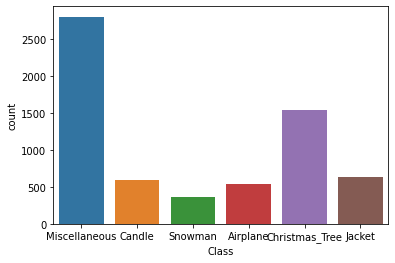

In [7]:
sns.countplot(df['Class'])

In [8]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
train_df , valid_df = train_test_split(df , test_size = .15 , stratify = df.Class.values , shuffle = True)

In [11]:
train_df.head()

,Image,Class
2693,image8056.jpg,Snowman
470,image6097.jpg,Christmas_Tree
1373,image3898.jpg,Airplane
4978,image2316.jpg,Snowman
756,image1214.jpg,Christmas_Tree


In [12]:
# Preprocessing the Training set
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [13]:
training_set = train_datagen.flow_from_dataframe(dataframe = train_df , 
                                                 directory = 'train',
                                                 x_col = 'Image' , 
                                                 y_col = 'Class',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 5498 validated image filenames belonging to 6 classes.


In [14]:
validation_set = train_datagen.flow_from_dataframe(dataframe = valid_df , 
                                                 directory = 'train',
                                                 x_col = 'Image' , 
                                                 y_col = 'Class',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 971 validated image filenames belonging to 6 classes.


In [15]:
test_df = pd.DataFrame()
test_images = os.listdir('test')
test_df['Image'] = test_images
test_df.head()

,Image
0,image2754.jpg
1,image7473.jpg
2,image2089.jpg
3,image1935.jpg
4,image5609.jpg


In [16]:
# Preprocessing the Test set
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_dataframe(test_df,
                                            directory = 'test',
                                            x_col = 'Image' , 
                                             y_col = None,
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = None)

Found 3489 validated image filenames.


In [17]:
from tensorflow.keras.layers import Conv2D

In [18]:
# Initialising the CNN
cnn = tf.keras.models.Sequential()

# Step 1 - Convolution
cnn.add(tf.keras.layers.Conv2D(filters=32,padding="same",kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

# Step 2 - Pooling
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Adding a second convolutional layer
cnn.add(tf.keras.layers.Conv2D(filters=32,padding='same',kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Step 3 - Flattening
cnn.add(tf.keras.layers.Flatten())

# Step 4 - Full Connection
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

# Step 5 - Output Layer
cnn.add(tf.keras.layers.Dense(units=6, activation='softmax'))

In [19]:
cnn.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1048704   
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 7

In [20]:
# Compiling the CNN
cnn.compile(optimizer = 'adam', loss = 'CategoricalCrossentropy', metrics = ['accuracy'])

In [21]:
# Training the CNN on the Training set and evaluating it on the Test set
cnn.fit(x = training_set, validation_data = validation_set, epochs = 20)

Epoch 1/20
172/172 [==============================] - 1440s 8s/step - loss: 1.3688 - accuracy: 0.4887 - val_loss: 1.0998 - val_accuracy: 0.5798
Epoch 2/20
172/172 [==============================] - 14s 82ms/step - loss: 1.0879 - accuracy: 0.5994 - val_loss: 1.0142 - val_accuracy: 0.6179
Epoch 3/20
172/172 [==============================] - 14s 81ms/step - loss: 1.0181 - accuracy: 0.6288 - val_loss: 0.9717 - val_accuracy: 0.6488
Epoch 4/20
172/172 [==============================] - 14s 81ms/step - loss: 0.9834 - accuracy: 0.6293 - val_loss: 0.9253 - val_accuracy: 0.6612
Epoch 5/20
172/172 [==============================] - 14s 81ms/step - loss: 0.9189 - accuracy: 0.6537 - val_loss: 0.9166 - val_accuracy: 0.6529
Epoch 6/20
172/172 [==============================] - 14s 81ms/step - loss: 0.8414 - accuracy: 0.6824 - val_loss: 0.9114 - val_accuracy: 0.6498
Epoch 7/20
172/172 [==============================] - 14s 81ms/step - loss: 0.8179 - accuracy: 0.6979 - val_loss: 0.9374 - val_accuracy:

# Transfer Learning 

In [22]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [27]:
# add preprocessing layer to the front of VGG
vgg = VGG16( input_shape=[64, 64, 3] , weights='imagenet', include_top=False)

# don't train existing weights
for layer in vgg.layers:
  layer.trainable = False

In [29]:
# our layers - you can add more if you want
x = Flatten()(vgg.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(6 , activation='softmax')(x)

In [30]:
# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

In [31]:
# view the structure of the model
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 64, 64, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 64, 64, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 64, 64, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 32, 32, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 32, 32, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 32, 32, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 16, 16, 128)       0     

In [32]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [35]:
r = model.fit(x = training_set, validation_data = validation_set, epochs = 20)

Epoch 1/20
172/172 [==============================] - 15s 86ms/step - loss: 0.6119 - accuracy: 0.7846 - val_loss: 0.7590 - val_accuracy: 0.7250
Epoch 2/20
172/172 [==============================] - 15s 86ms/step - loss: 0.6156 - accuracy: 0.7759 - val_loss: 0.7457 - val_accuracy: 0.7230
Epoch 3/20
172/172 [==============================] - 15s 87ms/step - loss: 0.6160 - accuracy: 0.7730 - val_loss: 0.7554 - val_accuracy: 0.7209
Epoch 4/20
172/172 [==============================] - 15s 87ms/step - loss: 0.5923 - accuracy: 0.7806 - val_loss: 0.7624 - val_accuracy: 0.7158
Epoch 5/20
172/172 [==============================] - 15s 88ms/step - loss: 0.5861 - accuracy: 0.7876 - val_loss: 0.7427 - val_accuracy: 0.7219
Epoch 6/20
172/172 [==============================] - 15s 86ms/step - loss: 0.5823 - accuracy: 0.7823 - val_loss: 0.7565 - val_accuracy: 0.7137
Epoch 7/20
172/172 [==============================] - 15s 85ms/step - loss: 0.5699 - accuracy: 0.7901 - val_loss: 0.7684 - val_accuracy:

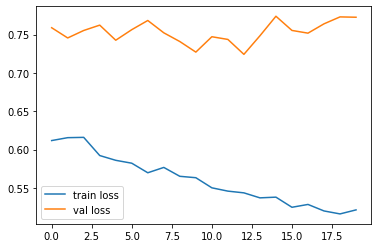

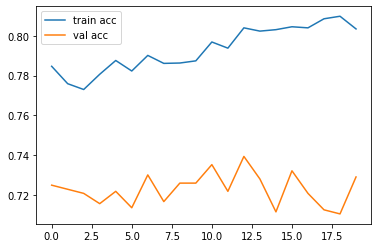

<Figure size 432x288 with 0 Axes>

In [38]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [42]:
from tensorflow.keras.applications import ResNet50

pretrained_model=ResNet50( input_shape=(64, 64, 3),
                                  include_top=False,
                                  weights='imagenet'
                                   )
#step2
for layer in pretrained_model.layers:
     layer.trainable = False

94773248/94765736 [==============================] - 0s 0us/step


In [43]:
# our layers - you can add more if you want
x = Flatten()(pretrained_model.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(6 , activation='softmax')(x)

In [44]:
# create a model object
model = Model(inputs=pretrained_model.input, outputs=prediction)

In [45]:
# view the structure of the model
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 64, 64, 3)]  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 70, 70, 3)    0           input_3[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 32, 32, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 32, 32, 64)   256         conv1_conv[0][0]                 
____________________________________________________________________________________________

In [46]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [47]:
r = model.fit(x = training_set, validation_data = validation_set, epochs = 20)

Epoch 1/20
172/172 [==============================] - 19s 95ms/step - loss: 1.5197 - accuracy: 0.4032 - val_loss: 1.3887 - val_accuracy: 0.4593
Epoch 2/20
172/172 [==============================] - 15s 87ms/step - loss: 1.3689 - accuracy: 0.4673 - val_loss: 1.3440 - val_accuracy: 0.4665
Epoch 3/20
172/172 [==============================] - 15s 90ms/step - loss: 1.3363 - accuracy: 0.4889 - val_loss: 1.3074 - val_accuracy: 0.4995
Epoch 4/20
172/172 [==============================] - 15s 89ms/step - loss: 1.3090 - accuracy: 0.4850 - val_loss: 1.2953 - val_accuracy: 0.5170
Epoch 5/20
172/172 [==============================] - 15s 88ms/step - loss: 1.2992 - accuracy: 0.4948 - val_loss: 1.2830 - val_accuracy: 0.4809
Epoch 6/20
172/172 [==============================] - 15s 87ms/step - loss: 1.2745 - accuracy: 0.4971 - val_loss: 1.2415 - val_accuracy: 0.5283
Epoch 7/20
172/172 [==============================] - 15s 88ms/step - loss: 1.2448 - accuracy: 0.5039 - val_loss: 1.2589 - val_accuracy:

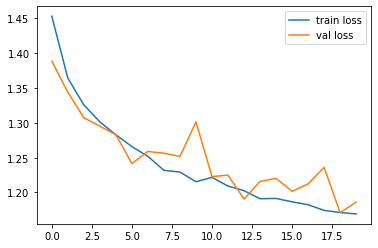

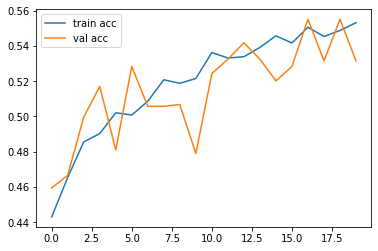

<Figure size 432x288 with 0 Axes>

In [48]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')